In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf

# Define the NIFTY 50 ticker symbol
nifty_ticker = "^NSEI"  # NIFTY 50 index on Yahoo Finance

# Fetch the NIFTY 50 data
nifty_data = yf.Ticker(nifty_ticker)

# Get historical market data (specifying a date range)
df = nifty_data.history(period="max")  # Retrieve all available data

# Reset the index to move the date to a column
df = df.reset_index()
df = df.drop(['Dividends', 'Stock Splits'], axis=1)
df

,Date,Open,High,Low,Close,Volume
0,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0
1,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0
2,2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0
3,2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0
4,2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0
...,...,...,...,...,...,...
4174,2024-09-27 00:00:00+05:30,26248.250000,26277.349609,26151.400391,26178.949219,490300
4175,2024-09-30 00:00:00+05:30,26061.300781,26134.699219,25794.099609,25810.849609,343100
4176,2024-10-01 00:00:00+05:30,25788.449219,25907.599609,25739.199219,25796.900391,247400
4177,2024-10-03 00:00:00+05:30,25452.849609,25639.449219,25230.300781,25250.099609,423400


# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0
1,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0
2,2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0
3,2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0
4,2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume
4174,2024-09-27 00:00:00+05:30,26248.250000,26277.349609,26151.400391,26178.949219,490300
4175,2024-09-30 00:00:00+05:30,26061.300781,26134.699219,25794.099609,25810.849609,343100
4176,2024-10-01 00:00:00+05:30,25788.449219,25907.599609,25739.199219,25796.900391,247400
4177,2024-10-03 00:00:00+05:30,25452.849609,25639.449219,25230.300781,25250.099609,423400
4178,2024-10-04 00:00:00+05:30,25181.900391,25485.050781,24966.800781,25014.599609,374900


In [ ]:
df.shape

(4179, 6)

In [ ]:
#Checking the data types
df.dtypes

,0
Date,"datetime64[ns, Asia/Kolkata]"
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [ ]:
df.isna().any()

,0
Date,False
Open,False
High,False
Low,False
Close,False
Volume,False


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                       
---  ------  --------------  -----                       
 0   Date    4179 non-null   datetime64[ns, Asia/Kolkata]
 1   Open    4179 non-null   float64                     
 2   High    4179 non-null   float64                     
 3   Low     4179 non-null   float64                     
 4   Close   4179 non-null   float64                     
 5   Volume  4179 non-null   int64                       
dtypes: datetime64[ns, Asia/Kolkata](1), float64(4), int64(1)
memory usage: 196.0 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,4179.000000,4179.000000,4179.000000,4179.000000,4.179000e+03
mean,9917.384350,9971.205121,9848.164398,9911.322795,2.041497e+05
std,5327.048459,5340.667563,5305.726895,5324.694527,2.094477e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,0.000000e+00
25%,5569.300049,5609.649902,5524.550049,5566.349854,0.000000e+00
50%,8402.349609,8445.599609,8346.799805,8389.900391,1.760000e+05
75%,11936.150391,11980.350098,11863.400391,11922.100098,2.848500e+05
max,26248.250000,26277.349609,26151.400391,26216.050781,1.811000e+06


In [ ]:
df[df.duplicated()]

,Date,Open,High,Low,Close,Volume


**Observation**: No duplicates in our data

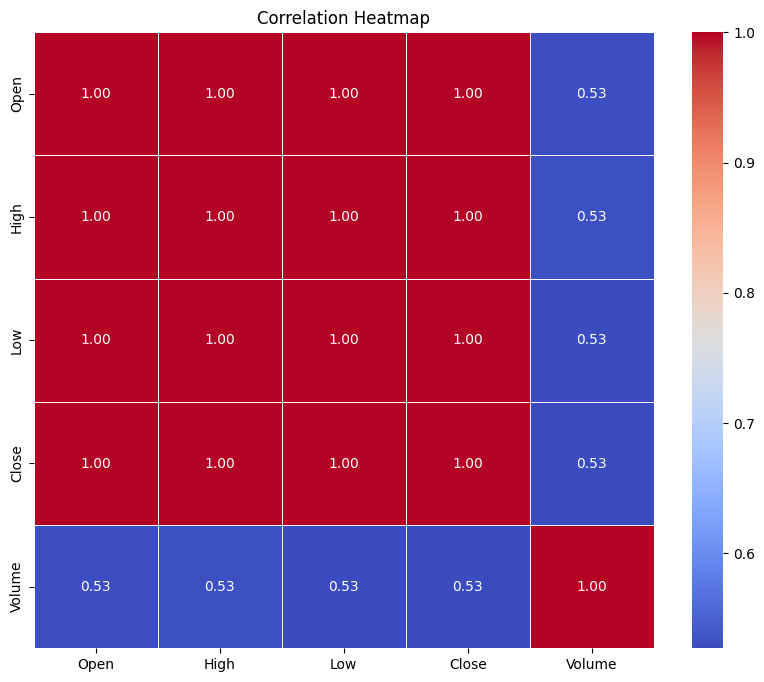

In [ ]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Pairplot

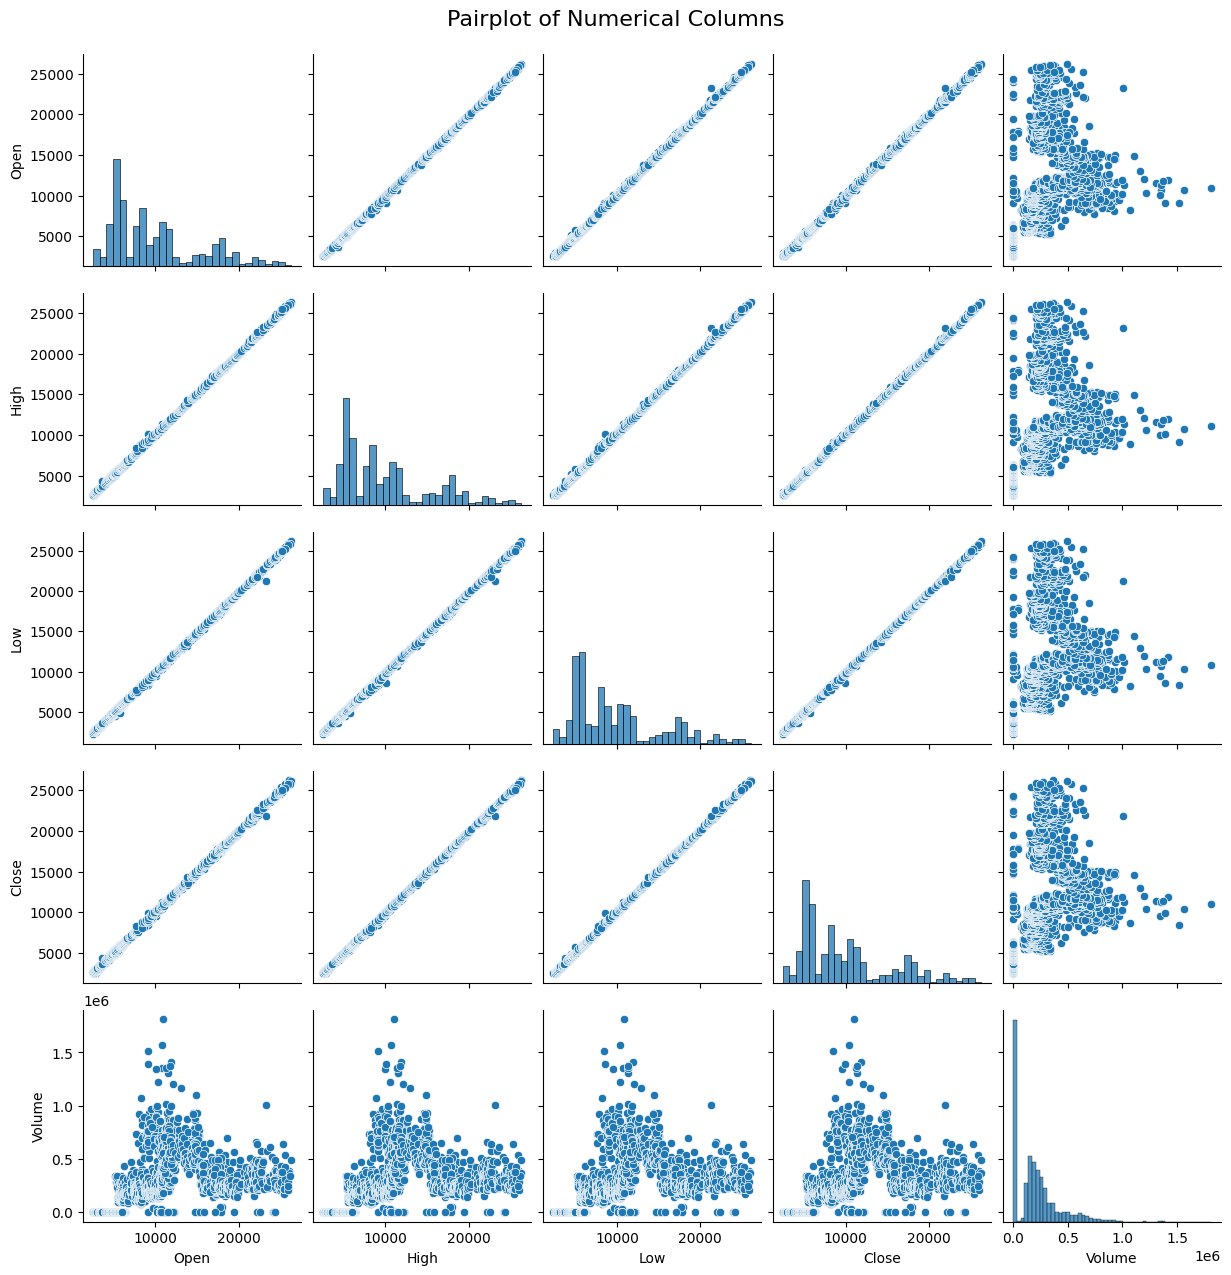

In [ ]:
# Plotting pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', fontsize=16, y=1.02)
plt.show()

### Histogram

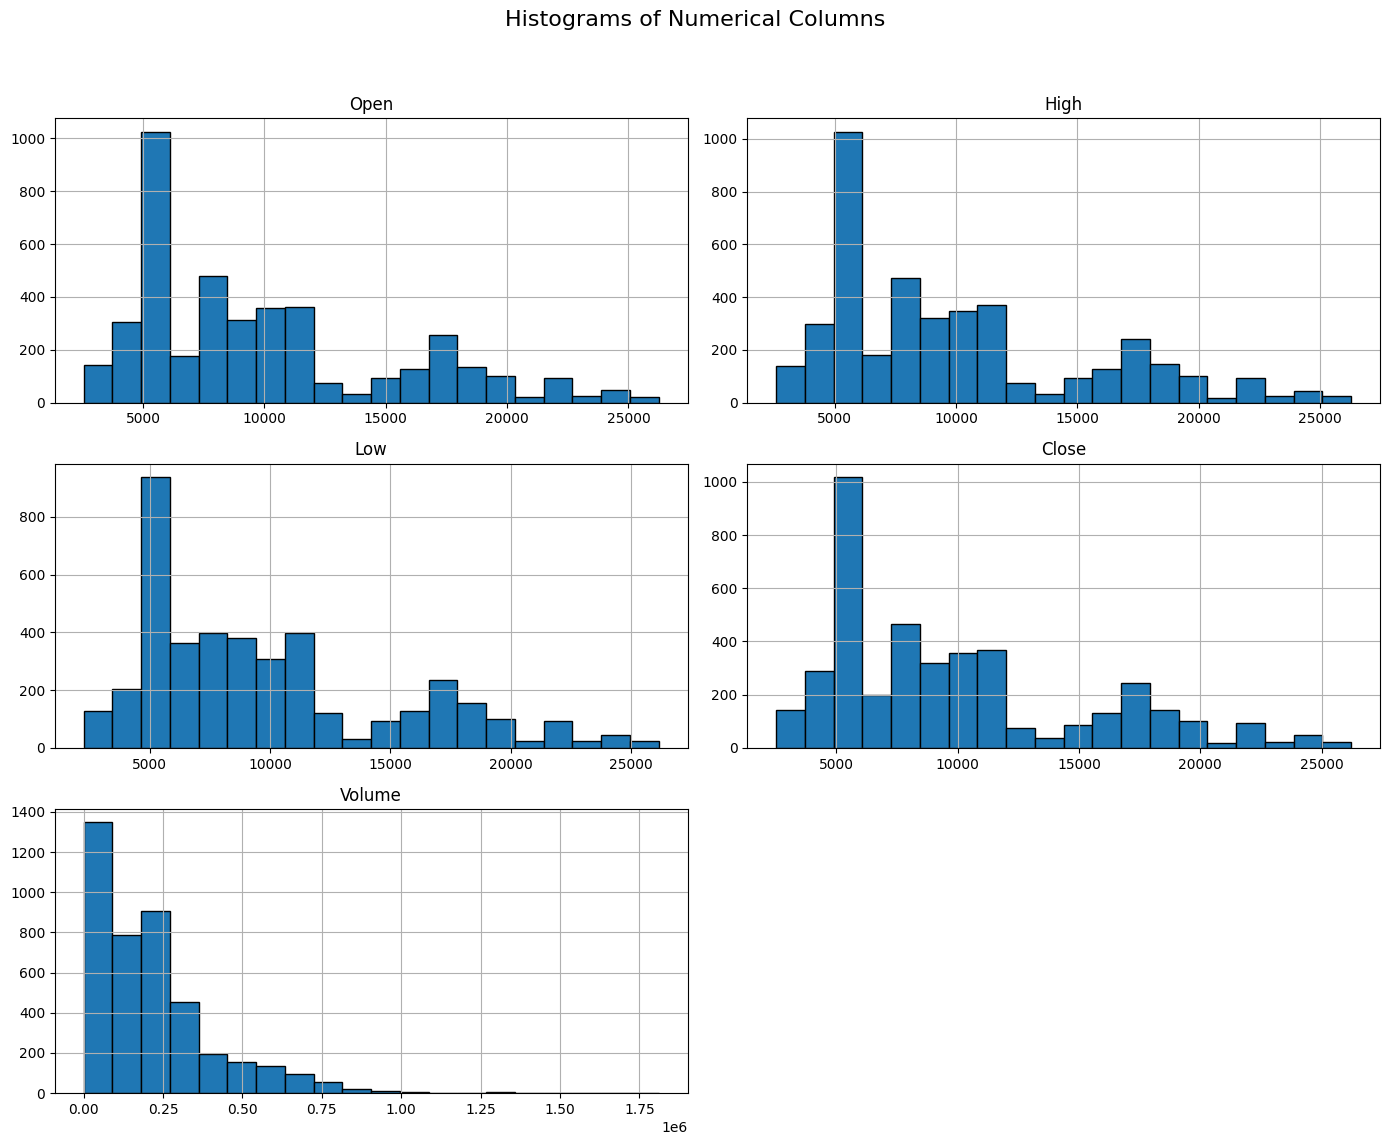

In [ ]:
# Plotting histograms for all numerical columns
numerical_df.hist(figsize=(14, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Boxplot Construction

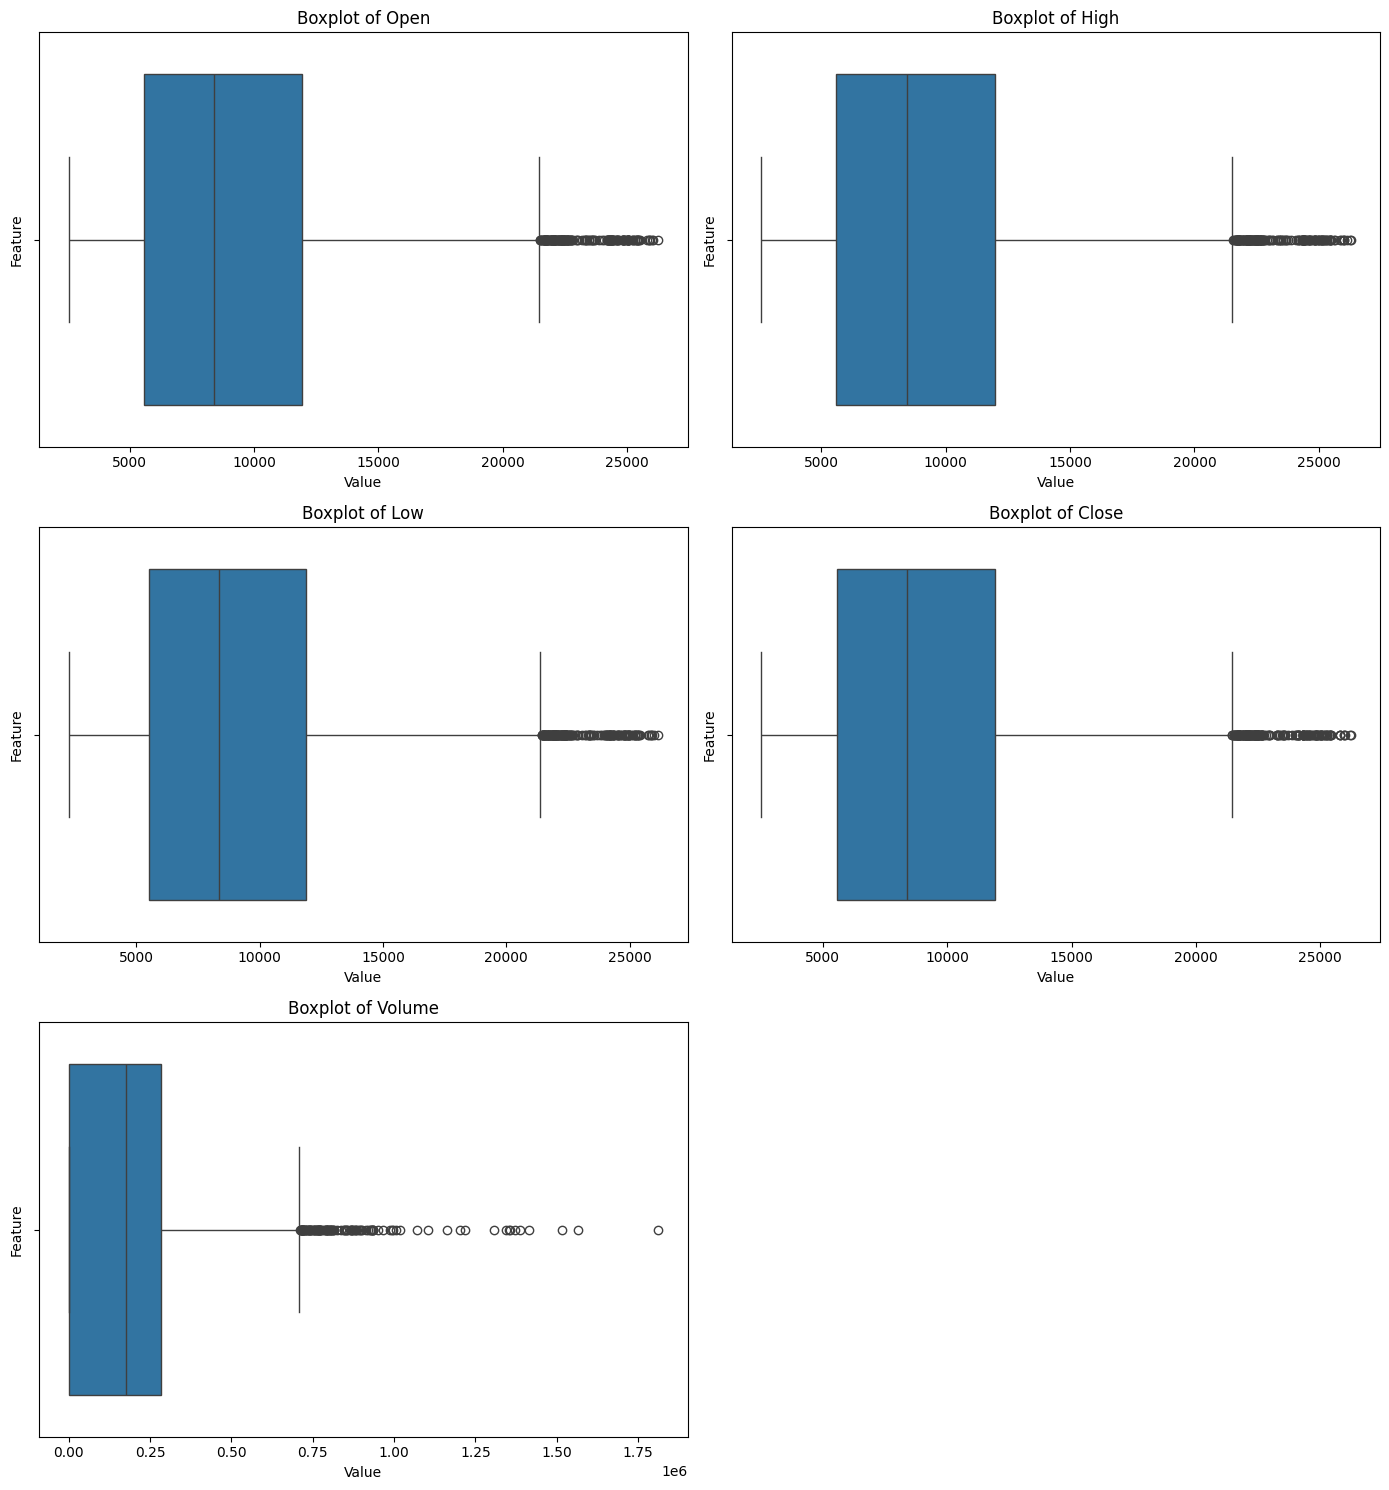

In [ ]:
# Define the number of columns for the subplots
num_cols = 2

# Determine the number of rows needed
num_rows = (len(numerical_df.columns) + num_cols - 1) // num_cols

# Create subplots
plt.figure(figsize=(14, num_rows * 5))  # Adjust the figure size as needed

for i, column in enumerate(numerical_df.columns):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot for each column
    sns.boxplot(data=numerical_df[column], orient='h')
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Feature')
    #plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## Data Visualization

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0
...,...,...,...,...,...
2024-09-27 00:00:00+05:30,26248.250000,26277.349609,26151.400391,26178.949219,490300
2024-09-30 00:00:00+05:30,26061.300781,26134.699219,25794.099609,25810.849609,343100
2024-10-01 00:00:00+05:30,25788.449219,25907.599609,25739.199219,25796.900391,247400


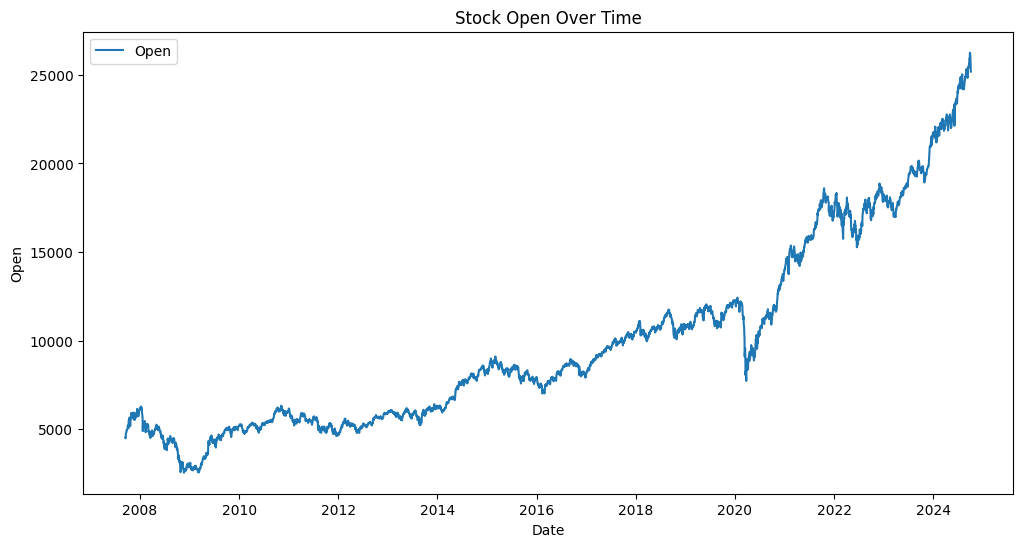

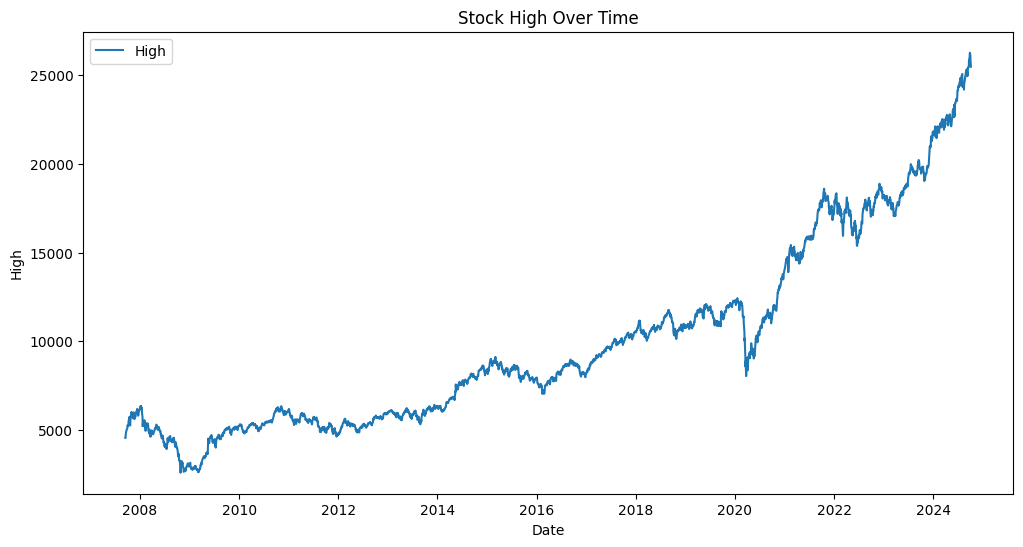

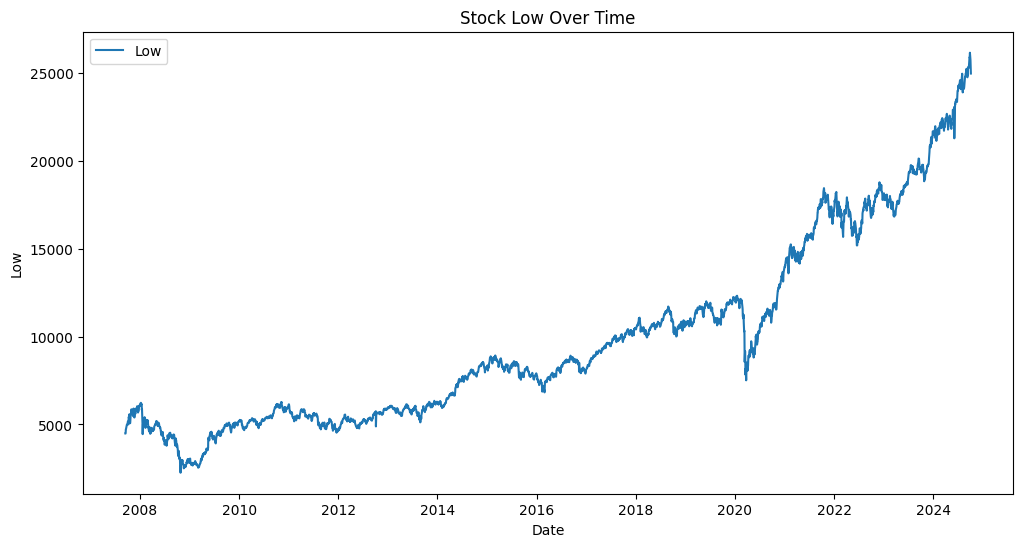

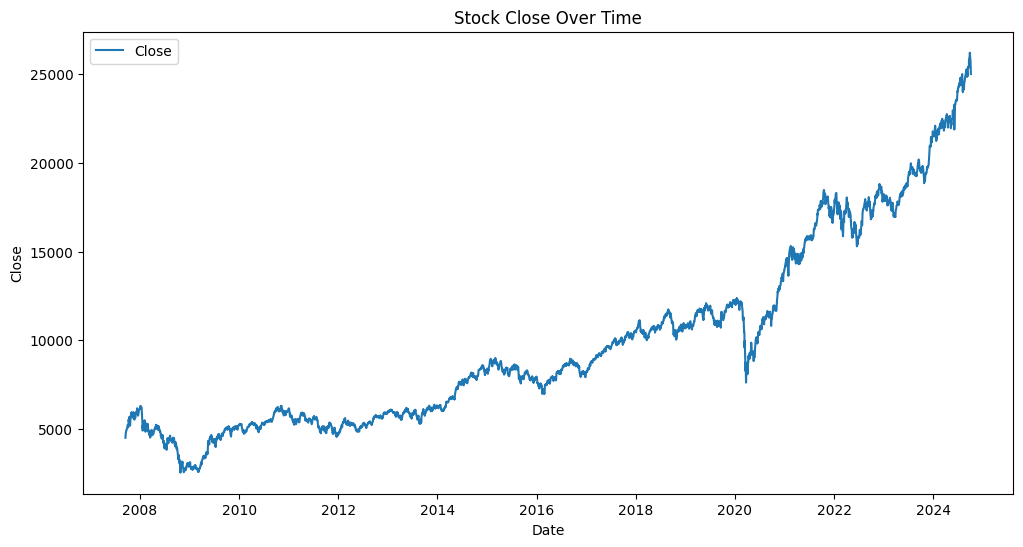

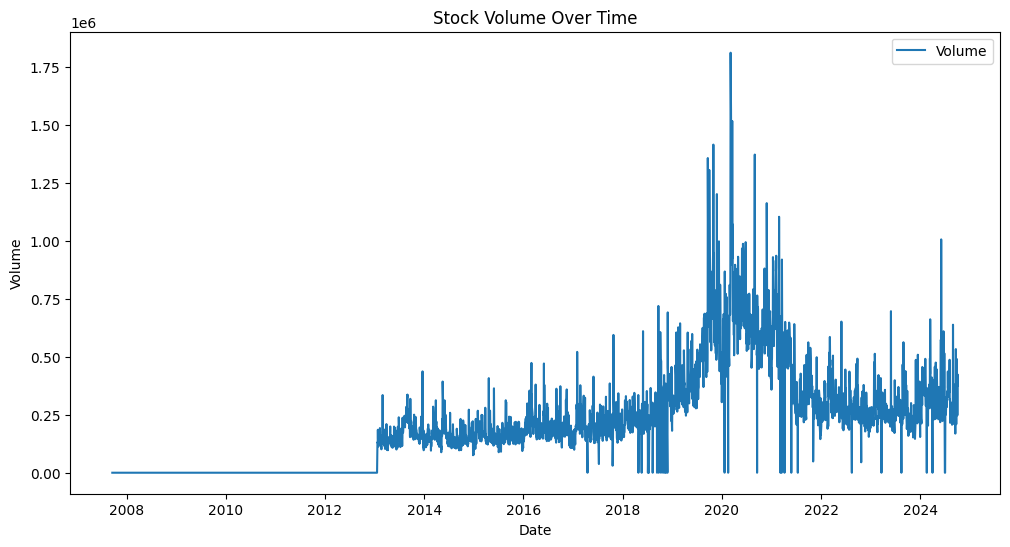

In [ ]:
for column in numerical_df:
    plt.figure(figsize=(12, 6))  # Create a new figure for each plot
    plt.plot(df.index, df[column], label=column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Stock {column} Over Time')
    plt.legend()
    plt.show()

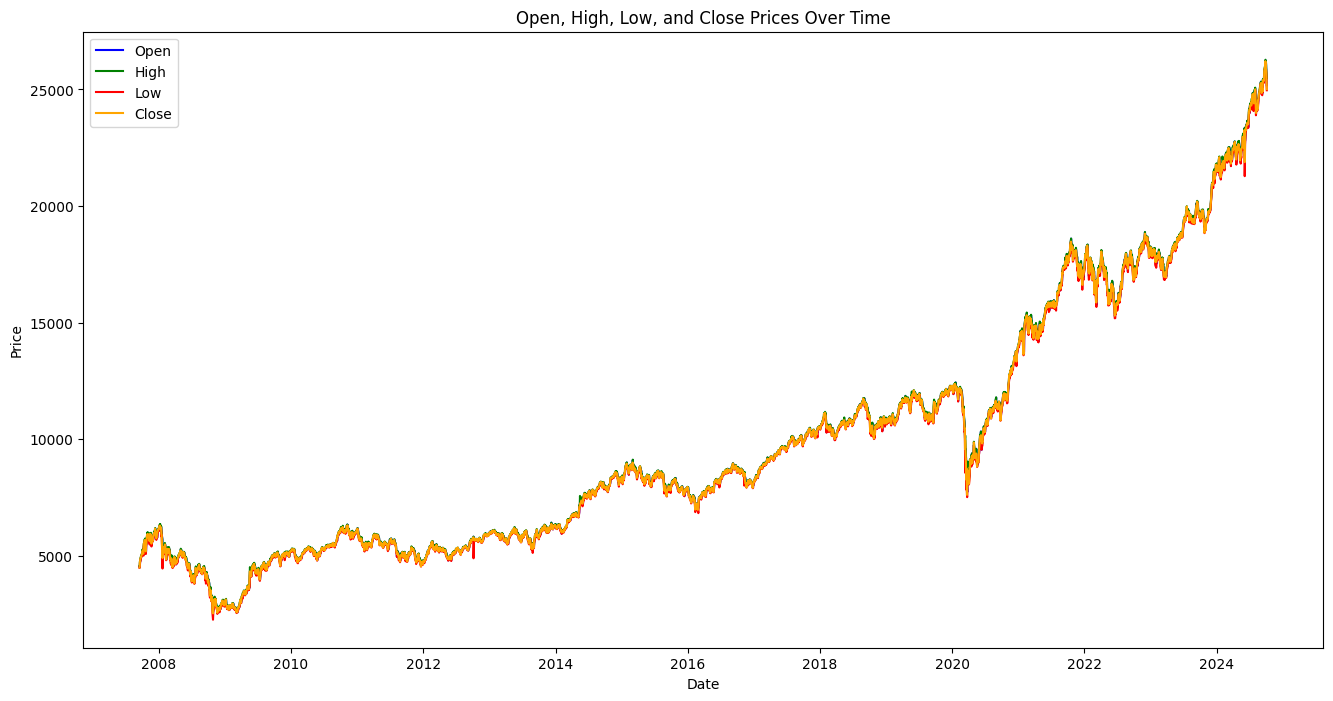

In [ ]:
# Plotting
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Open'], label='Open', color='blue')
plt.plot(df.index, df['High'], label='High', color='green')
plt.plot(df.index, df['Low'], label='Low', color='red')
plt.plot(df.index, df['Close'], label='Close', color='orange')

plt.title('Open, High, Low, and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(False)
plt.show()

### Distribution of Daily Price Changes

The **Distribution of daily price changes** refers to how often different magnitudes of price changes occur in a stock. It's essentially a way of visualizing how much the price of a stock fluctuates on a daily basis.

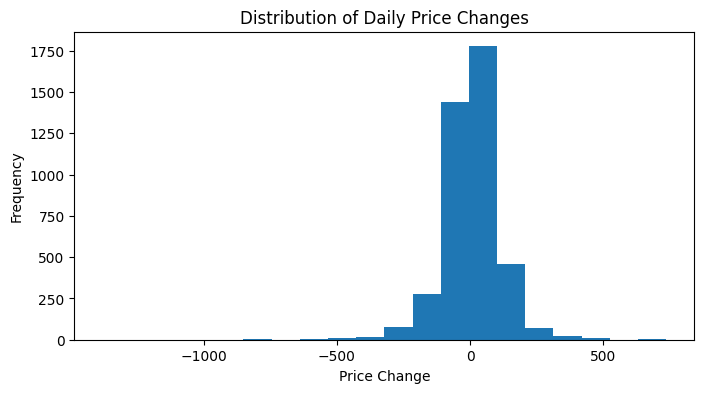

In [ ]:
# Histogram of daily price changes
plt.figure(figsize=(8, 4))
plt.hist(df['Close'].diff(), bins=20)
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

**Observation :** The concentration around 0 suggests that the stock price does not fluctuate widely on most days. In other words, the stock experiences small daily changes.

### Daily returns over time

Daily returns over time in stocks data refers to the **percentage change in the price of a stock from one day to the next**. It's a way to track how much an investment in a particular stock has gained or lost each day.
#### Example:
- Day 1: Stock price is 100
- Day 2: Stock price is 105
- The daily return for Day 2 would be calculated as:
((Day 2 Price - Day 1 Price) / Day 1 Price) * 100 = (($105 - $100) / $100) * 100 = 5%

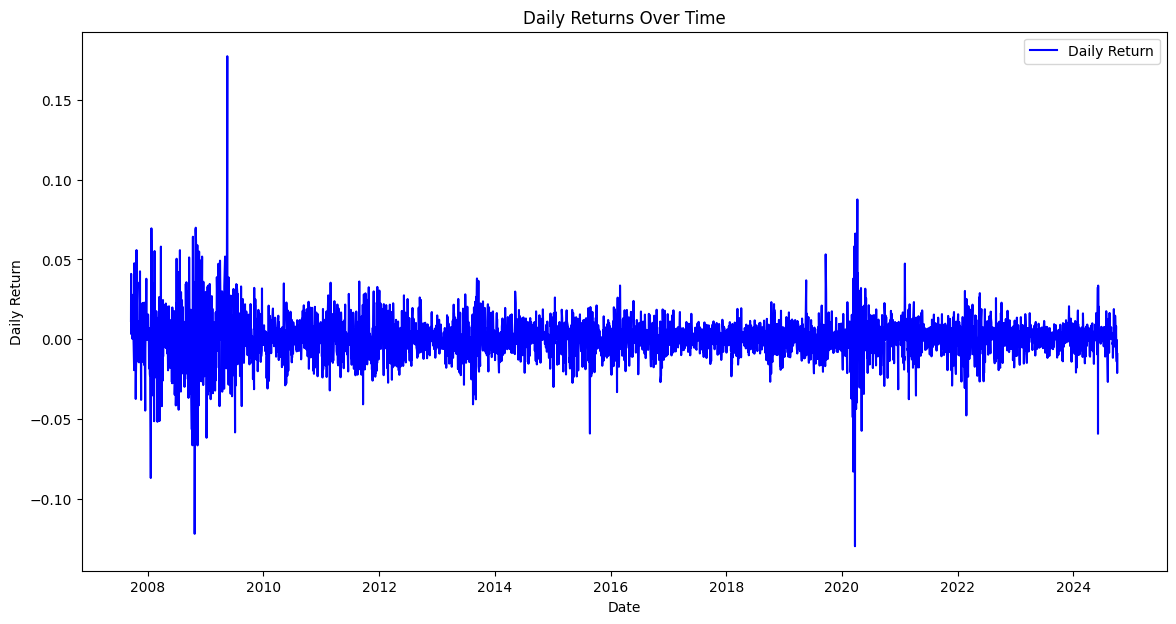

In [ ]:
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Daily Return'], label='Daily Return', color = 'blue')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(False)
plt.show()

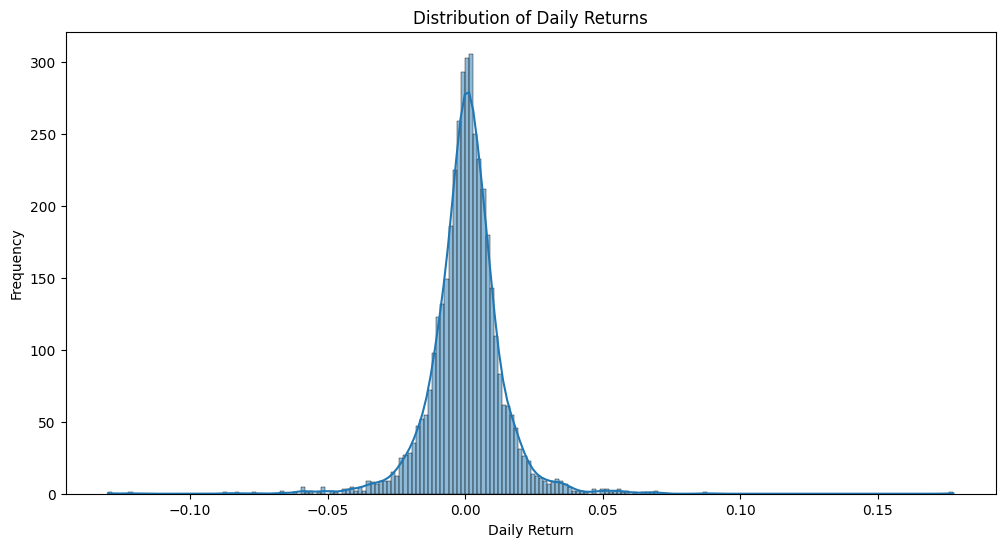

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily Return'].dropna(), kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

### Volatility

Volatility in NIFTY 50 stock data refers to the **degree of variation or fluctuation in the index's price over a given period**. It measures the magnitude of price swings, regardless of whether they are upward or downward. Higher volatility in the NIFTY 50 indicates a greater potential for both large gains and large losses, making the index riskier.

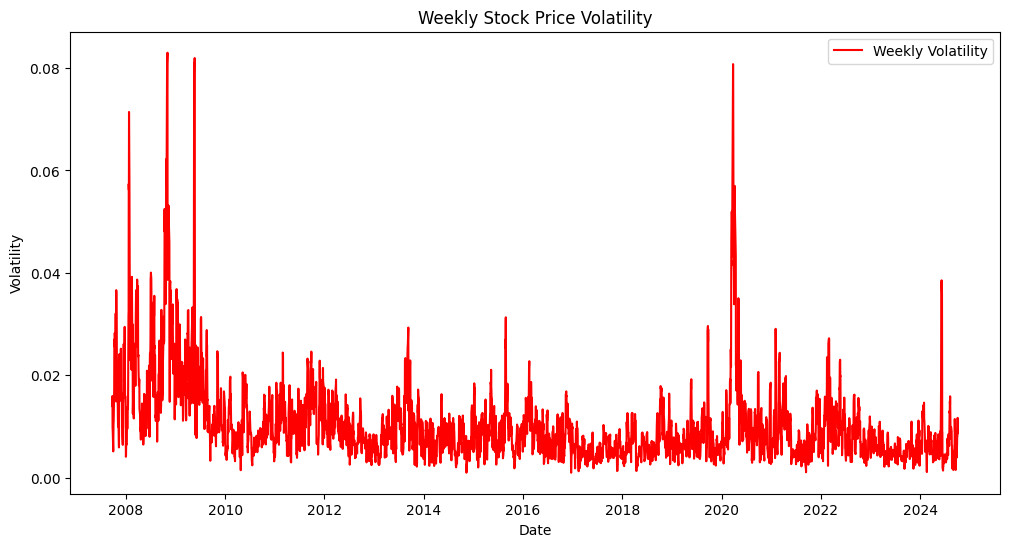

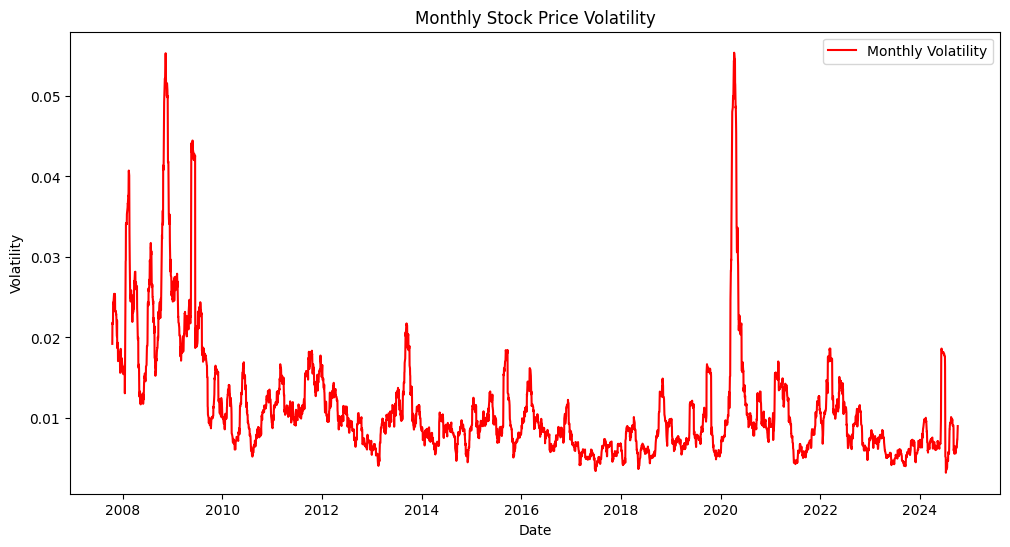

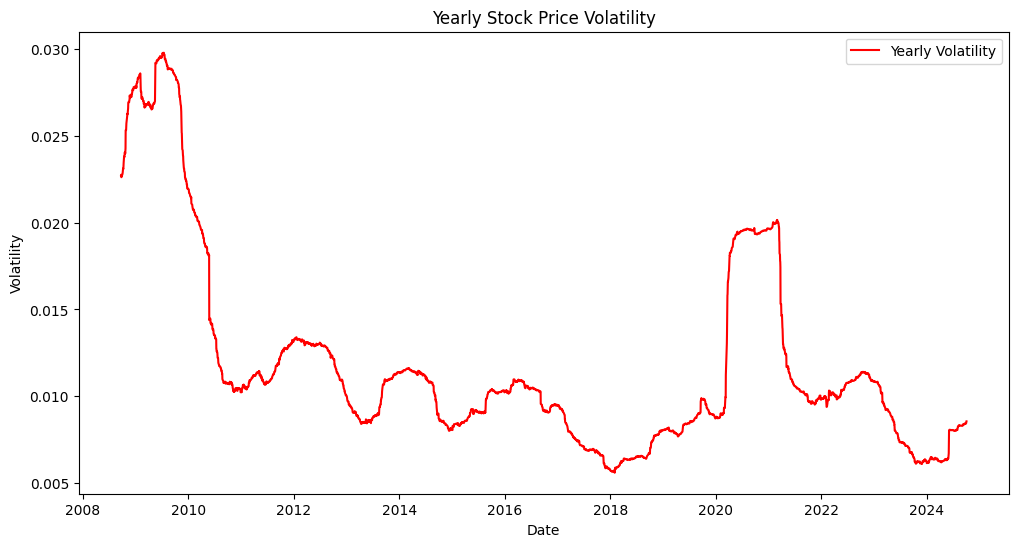

In [ ]:
rolling_windows = {
    'Weekly': 5,
    'Monthly': 21,
    'Yearly': 252
}

# Calculate volatility for each period
for label, window in rolling_windows.items():
    df[f'{label} Volatility'] = df['Daily Return'].rolling(window=window).std()

# Plot each volatility separately
for label in rolling_windows.keys():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[f'{label} Volatility'], label=f'{label} Volatility', color='red')
    plt.title(f'{label} Stock Price Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(False)
    plt.show()

In [ ]:
# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = np.std(df["Daily Return"])

# Weekly volatility (assuming 5 trading days in a week)
weekly_volatility = daily_volatility * np.sqrt(5)

# Monthly volatility (assuming approximately 21 trading days in a month)
monthly_volatility = daily_volatility * np.sqrt(21)

# Annualized volatility (assuming 252 trading days in a year)
annualized_volatility = daily_volatility * np.sqrt(252)

# Convert to percentages
daily_volatility_percentage = daily_volatility * 100
weekly_volatility_percentage = weekly_volatility * 100
monthly_volatility_percentage = monthly_volatility * 100
annualized_volatility_percentage = annualized_volatility * 100

# Print results in percentage format
print(f"Daily Volatility: {daily_volatility_percentage:.2f}%")
print(f"Weekly Volatility: {weekly_volatility_percentage:.2f}%")
print(f"Monthly Volatility: {monthly_volatility_percentage:.2f}%")
print(f"Annual Volatility: {annualized_volatility_percentage:.2f}%")

Daily Volatility: 1.34%
Weekly Volatility: 2.99%
Monthly Volatility: 6.12%
Annual Volatility: 21.21%


**Observation :**The volatility data for the NIFTY 50 index indicates that while daily fluctuations are relatively stable at **1.34%**, both weekly (**2.99%**) and monthly (**6.12%**) volatilities suggest increasing price movements over time. The annual volatility of **21.21%** highlights a significant risk and uncertainty for long-term investors, indicating potential for both substantial gains and losses. Investors should be prepared for these fluctuations and align their strategies with their risk tolerance.

# **Moving Average**

Moving average is a statistical method used to analyze data points by creating a series of averages of a fixed size that move over a dataset. This helps to smooth out short-term fluctuations and reveal underlying trends.

In simpler terms, it's like taking a rolling average of a set of numbers. For example, a 50-day moving average would calculate the average price of a stock over the past 50 days, and this average would be updated daily as new data points become available.

This technique is commonly used in financial analysis, particularly for analyzing stock prices. It can help identify trends, support and resistance levels, and generate trading signals.

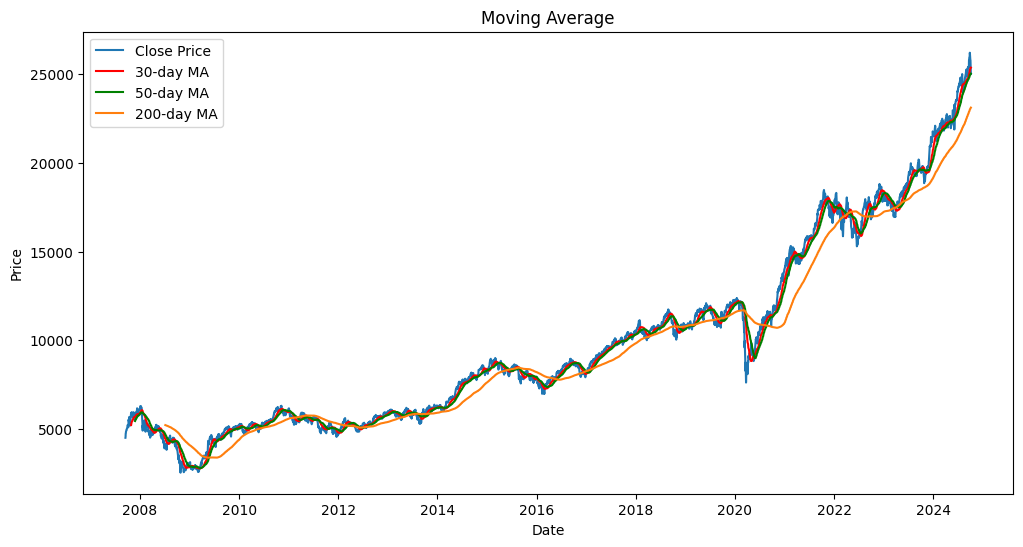

In [ ]:
# Calculate moving average
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Visualize
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_30'], label='30-day MA', color = 'red')
plt.plot(df['MA_50'], label='50-day MA', color = 'green')
plt.plot(df['MA_200'], label='200-day MA')
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

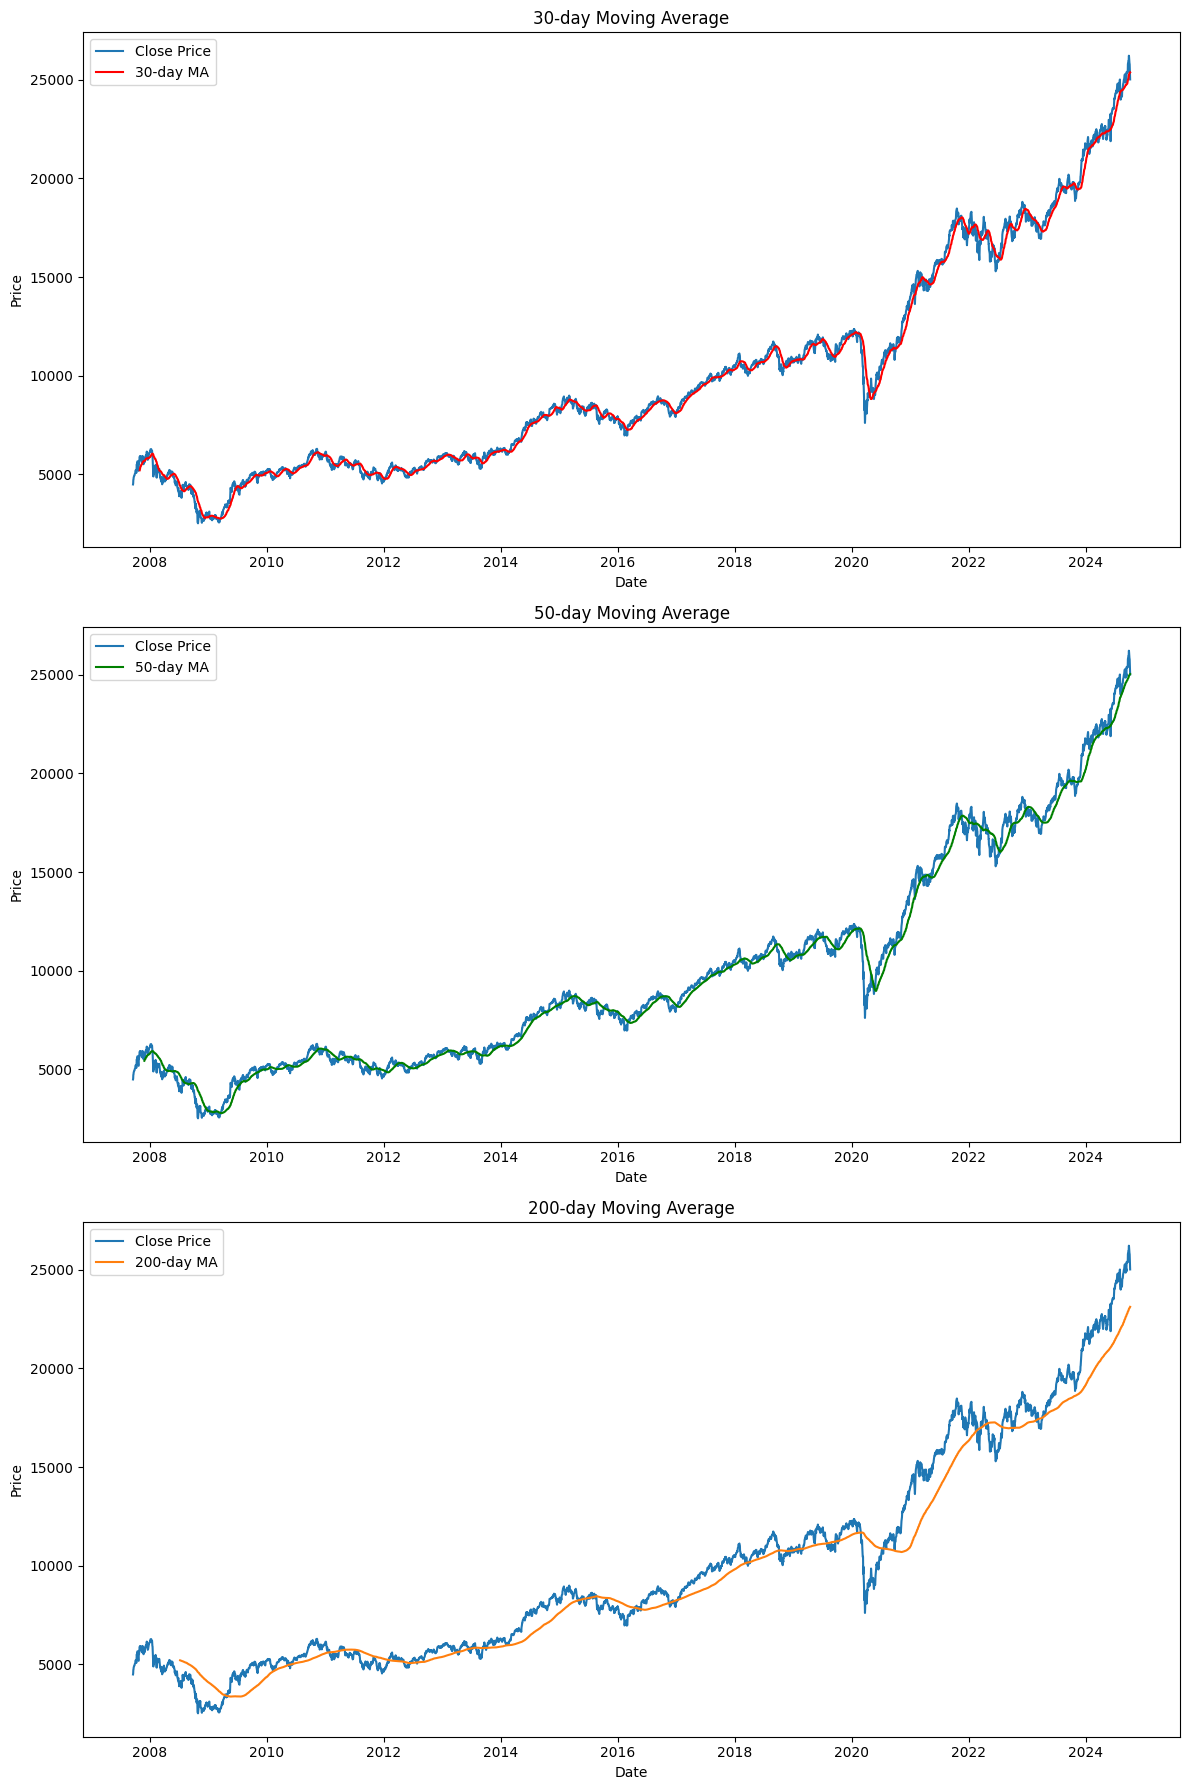

In [ ]:
# Calculate moving average
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Visualize
fig, axs = plt.subplots(3, figsize=(12, 18))

axs[0].plot(df['Close'], label='Close Price')
axs[0].plot(df['MA_30'], label='30-day MA', color='red')
axs[0].set_title('30-day Moving Average')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(df['Close'], label='Close Price')
axs[1].plot(df['MA_50'], label='50-day MA', color = 'green')
axs[1].set_title('50-day Moving Average')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

axs[2].plot(df['Close'], label='Close Price')
axs[2].plot(df['MA_200'], label='200-day MA')
axs[2].set_title('200-day Moving Average')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
df

,Open,High,Low,Close,Volume,Daily Return,Weekly Volatility,Monthly Volatility,Yearly Volatility,MA_30,MA_50,MA_200
Date,,,,,,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.011469,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.040946,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.003212,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.018957,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-27 00:00:00+05:30,26248.250000,26277.349609,26151.400391,26178.949219,490300,-0.001415,0.003953,0.006446,0.008419,25273.531641,24955.076016,23028.506211
2024-09-30 00:00:00+05:30,26061.300781,26134.699219,25794.099609,25810.849609,343100,-0.014061,0.008178,0.007315,0.008469,25314.804948,24980.675000,23052.871963
2024-10-01 00:00:00+05:30,25788.449219,25907.599609,25739.199219,25796.900391,247400,-0.000540,0.008164,0.007322,0.008433,25351.406641,25006.428008,23077.350713


# **Model Building**

# **1. Long Short-Term Memory**

LSTM is a type of recurrent neural network (RNN) architecture designed to model and predict sequences of data. It is particularly effective in capturing long-term dependencies and managing issues related to vanishing gradients that are common in traditional RNNs. LSTMs achieve this through their special gating mechanisms that control the flow of information.

**1. Handling Sequential Data**
Stock prices are inherently sequential data where the value at a given time depends on previous values. LSTMs are designed to handle such sequential dependencies and can learn from patterns over time.

**2. Capturing Long-Term Dependencies**
LSTMs are capable of capturing long-term dependencies in data. In the context of stock prices, this means they can remember information from many time steps ago, which is important for understanding trends and making predictions based on historical data.

**3. Learning Complex Patterns**
LSTMs can model complex patterns in time series data. Stock price movements can be influenced by a variety of factors including past prices, market trends, and external events. LSTMs can capture these complexities better than simpler models due to their advanced memory mechanisms.

**4. Flexibility with Input Features**
LSTMs can be used with various types of input features, not just raw stock prices. This allows analysts to incorporate additional information such as trading volumes, technical indicators, or even external factors like economic indicators or news sentiment.

**5. Improving Forecast Accuracy**
Because LSTMs are designed to learn from sequences, they can often provide more accurate forecasts compared to simpler models that do not account for temporal dependencies. This is crucial for stock price prediction, where accurate forecasting can lead to better trading decisions.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import save_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Select the 'Close' price column
data = df['Close'].values.reshape(-1, 1)

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[0:train_size]
test_data = data[train_size:len(data)]

print(f"Training Data Size: {len(train_data)}")
print(f"Testing Data Size: {len(test_data)}")

Training Data Size: 3343
Testing Data Size: 836


In [ ]:
# Function to prepare the data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Hyperparameter ranges
look_back_values = [5, 10, 20, 30, 50]
units_values = [25, 50, 100, 150, 175, 200]

best_rmse = float('inf')
best_look_back = None
best_units = None
best_model = None

In [ ]:
for look_back in look_back_values:
    for units in units_values:
        print(f"\nTraining with look_back={look_back} and units={units}")

        # Create the training and testing datasets
        X_train, Y_train = create_dataset(train_data, look_back)
        X_test, Y_test = create_dataset(test_data, look_back)

        # Reshape the input to be [samples, time steps, features] which is required for LSTM
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        # Create a single-layer LSTM model
        model_lstm = Sequential()
        model_lstm.add(LSTM(units=units, input_shape=(X_train.shape[1], 1)))
        model_lstm.add(Dense(1))

        # Compile the model
        model_lstm.compile(loss='mean_squared_error', optimizer='adam')

        # Train the model
        model_lstm.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)

        # Make predictions
        train_predict = model_lstm.predict(X_train)
        test_predict = model_lstm.predict(X_test)

        # Invert predictions back to original scale
        train_predict = scaler.inverse_transform(train_predict)
        Y_train = scaler.inverse_transform([Y_train])
        test_predict = scaler.inverse_transform(test_predict)
        Y_test = scaler.inverse_transform([Y_test])

        # Evaluate the model
        train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
        test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

        print(f"Train Root Mean Squared Error: {train_rmse}")
        print(f"Test Root Mean Squared Error: {test_rmse}")

        # Check if this is the best model so far
        if test_rmse < best_rmse:
            best_rmse = test_rmse
            best_look_back = look_back
            best_units = units
            best_model = model_lstm

Streaming output truncated to the last 5000 lines.
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9891e-05
Epoch 98/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9770e-05
Epoch 99/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.2070e-05
Epoch 100/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6786e-05
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Root Mean Squared Error: 112.68370003573482
Test Root Mean Squared Error: 190.42010710266462

Training with look_back=5 and units=100
Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0120
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.4798e-05
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1651e-05
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6432e-05
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.7767e-05
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.9125e-05
Epoch 7/100
105/105 

In [ ]:
print(f"Best look_back: {best_look_back}")
print(f"Best units: {best_units}")
print(f"Best Test RMSE: {best_rmse}")

In [ ]:
# Optional: Plot the results for the best model
X_best_test, Y_best_test = create_dataset(test_data, best_look_back)
X_best_test = np.reshape(X_best_test, (X_best_test.shape[0], X_best_test.shape[1], 1))
best_test_predict = best_model.predict(X_best_test)
best_test_predict = scaler.inverse_transform(best_test_predict)
Y_best_test = scaler.inverse_transform([Y_best_test])

plt.figure(figsize=(12, 6))
plt.plot(Y_best_test[0], label='Test Actual')
plt.plot(best_test_predict[:,0], label='Test Predicted')
plt.title('Test Actual vs. Prediction (Best Model)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Saving the model**

In [ ]:
# Save the best model
model_filename = f'LSTM_NIFTY_{best_look_back}({best_rmse.round(2)}).h5'
save_model(model_lstm, model_filename)

print(f"The best model is saved as {model_filename}")

## **Predictions**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Predict the next 'future_steps' days from the last 'look_back' days
def predict_future(model, last_data, look_back, future_steps, last_date):
    # Prepare the last data point to feed the model
    future_predictions = []
    current_input = last_data[-look_back:].reshape(1, look_back, 1)

    # Generate future dates
    future_dates = [last_date + timedelta(days=i) for i in range(1, future_steps + 1)]

    for _ in range(future_steps):
        # Predict the next value
        predicted_value = model.predict(current_input)
        future_predictions.append(predicted_value[0][0])

        # Update the current input by appending the predicted value and removing the oldest value
        current_input = np.append(current_input[:,1:,:], predicted_value.reshape(1, 1, 1), axis=1)

    return future_predictions, future_dates

# Prepare the data for predicting future prices
last_data = test_data[-best_look_back:]  # Take the last 'look_back' values from the test set

# Last date from the test set
last_date = pd.to_datetime(df.index[train_size + len(test_data) - 1])

# Predict the next 10 days (you can change future_steps if needed)
future_steps = 10
future_predictions, future_dates = predict_future(best_model, last_data, best_look_back, future_steps, last_date)

# Inverse transform the predictions to get the actual predicted price
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame for the predictions with dates
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_predictions_actual.flatten()
})

# Print the DataFrame
future_df

In [ ]:
# Optional: Plot the predicted future prices along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(data)), scaler.inverse_transform(data), label='Historical Data')
plt.plot(np.arange(len(data), len(data) + future_steps), future_predictions_actual, label='Future Predictions', color='red')
plt.title('Predicted Nifty Prices for Next 10 Days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# ** Plot 2: Separate Visualization for Predicted Values **
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions_actual, label='Future Predictions', color='red', marker='o')
plt.title('Predicted Nifty Prices for the Next 10 Days (Separate)')
plt.xlabel('Date')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()